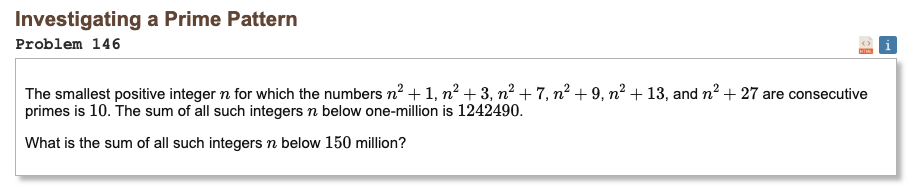

* we want even n where n²+1 3 7 9 13 27 are all prime and every other odd offset in 1..27 is composite
* n must end with 0 to avoid factors 2 and 5 so scan n in steps of 10 only
* use modular sieving with small primes to discard n whose n²+k hits a small divisor for any required k
* after sieving do a fast primality test on the six required values to confirm they are prime
* also check the remaining odd offsets 5 11 15 17 19 21 23 25 are composite to enforce consecutiveness
* deterministic miller–rabin with bases 2 3 5 7 11 13 17 is enough for 64 bit sizes here
* precompute small primes up to 1000 for a quick wheel and trial division speedups
* sum all n below the limit 150 million that pass all tests and print the total

In [1]:
import math

def sieve(n):
    bs = bytearray(b"\x01")*(n+1)
    bs[0:2] = b"\x00\x00"
    for p in range(2,int(n**0.5)+1):
        if bs[p]:
            step = p
            start = p*p
            bs[start:n+1:step] = b"\x00"*(((n - start)//step)+1)
    return [i for i,b in enumerate(bs) if b]

def mr_pow(a, d, n):
    r = 1
    while d:
        if d & 1:
            r = (r*a) % n
        a = (a*a) % n
        d >>= 1
    return r

def is_probable_prime(n):
    if n < 2:
        return False
    small_primes = (2,3,5,7,11,13,17,19,23,29,31,37)
    for p in small_primes:
        if n % p == 0:
            return n == p
    d = n - 1
    s = 0
    while d % 2 == 0:
        d //= 2
        s += 1
    for a in (2,3,5,7,11,13,17):
        if a >= n:
            continue
        x = mr_pow(a, d, n)
        if x == 1 or x == n-1:
            continue
        skip = False
        for _ in range(s-1):
            x = (x*x) % n
            if x == n-1:
                skip = True
                break
        if skip:
            continue
        return False
    return True

def is_prime(n, primes_td):
    for p in primes_td:
        if p*p > n:
            break
        if n % p == 0:
            return n == p
    return is_probable_prime(n)

def build_forbidden(primes, K):
    forb = {}
    for p in primes:
        if p in (2,5):
            continue
        arr = [False]*p
        for r in range(p):
            rr = (r*r) % p
            bad = False
            for k in K:
                if (rr + k) % p == 0:
                    bad = True
                    break
            arr[r] = bad
        forb[p] = arr
    return forb

def solve(limit=150_000_000):
    primes_td = sieve(1000)
    K_req = [1,3,7,9,13,27]
    K_forbid = K_req
    forb = build_forbidden(primes_td, K_forbid)
    others = [5,11,15,17,19,21,23,25]
    total = 0
    for n in range(10, limit, 10):
        bad = False
        for p, arr in forb.items():
            if arr[n % p]:
                bad = True
                break
        if bad:
            continue
        n2 = n*n
        good = True
        for k in K_req:
            if not is_prime(n2 + k, primes_td):
                good = False
                break
        if not good:
            continue
        bad2 = False
        for k in others:
            if is_prime(n2 + k, primes_td):
                bad2 = True
                break
        if bad2:
            continue
        total += n
    return total

result = solve()
print("Result:", result)

Result: 676333260
